<a href="https://colab.research.google.com/github/Brnvnrs/tallerDeGit/blob/main/Error_Numerico_2C_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error numérico

Cómo podemos representar estos conjuntos de número en una computadora?

- $\mathbb{N}_0$ naturales con el cero
- $\mathbb{Z}$ enteros
- $\mathbb{Q}$ racionales
- $\mathbb{R}$ reales
- $\mathbb{C}$ complejos

Recordemos que, dado un $x \in \mathbb{R}$ podemos escribirlo como

\begin{equation}
  x = \sum\limits_{j=0}^{N} a_j 10^j + \sum\limits_{j=1}^{\infty} b_j 10^{-j}
\end{equation}

donde el primer término es la parte entera y el segundo la decimal.

Análogamente, podemos escribirlos con cualquier base. En particular, base binaria

\begin{equation}
  x = \sum\limits_{j=0}^{N} a_j 2^j + \sum\limits_{j=1}^{\infty} b_j 2^{-j}
\end{equation}

Acá podemos considerar $a_j$ y $b_j$ como bits prendidos o apagados.

Para representar números reales se puede utilizar representación de punto fijo, y de punto flotante

### Representación de punto flotante

Estándar IEEE-754 del 1985 para precisión _single_ (32 bits) y _double_ (64 bits)

* Formatos aritméticos: conjuntos de datos de punto flotante binarios y decimales, que consisten en números finitos, infinitos y valores especiales "no numéricos" (NaN).
* Reglas de redondeo: propiedades que deben satisfacerse al redondear los números durante las operaciones aritméticas y las conversiones.
* Manejo de excepciones: indicaciones de condiciones excepcionales, tales como división por cero, desbordamiento, etc.
* Sólo se pueden representar un subconjunto de $\mathbb{Q}$, quedan fuera los racionales con decimales periódicos y los irracionales
* Hay una cantidad finita de números que son representables. Cuantos son: combinatoria de los valores signo, exponente y mantisa
* Sus números no estan uniformemente distribuidos entre el máximo y el mínimo. Sí lo están entre potencias sucesivas del exponente.

![](https://i.imgur.com/NThAtkZ.png)



|        | Signo (s) | Exponente (e)| Mantisa (m) | Sesgo (g)|
|--------|-----------|--------------|-------------|----------|
| Simple |     1 bit |     8 bits   |     23 bits | 127      |
| Doble  |     1 bit |     11 bits  |     52 bits | 1023     |


$x = (-1)^s \ 2^{e-g} \ (1 + m)$

Ejemplo 32 bits

![](https://i.imgur.com/EJGzDX9.png)

https://www.h-schmidt.net/FloatConverter/IEEE754.html

 Casos extremos para 64 bits
  
  * Los números positivos menores al mínimo representable  $ 2^{-1023} \ (1+2^{-52}) \approx 10^{-308}$, producen _underflow_
  * Los números positivos mayores al máximo representable  $2^{1024} \ (2-2^{-52}) \approx 10^{308}$, producen _overflow_
  * Epsilon de máquina: menor valor que cumple $1+ϵ>1$
  * NaN
  * Inf  

In [ ]:
import sys
import numpy as np

In [ ]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [ ]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [ ]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

minimum representable positive normalized float

In [ ]:
sys.float_info.min

2.2250738585072014e-308

difference between 1.0 and the least value greater than 1.0 that is representable as a float

In [ ]:
sys.float_info.epsilon

2.220446049250313e-16

In [ ]:
sys.float_info.min * sys.float_info.epsilon

5e-324

In [ ]:
1 + sys.float_info.epsilon

1.0000000000000002

In [ ]:
1 + sys.float_info.epsilon/2

1.0

In [ ]:
1 / sys.float_info.min

4.49423283715579e+307

In [ ]:
1 / (sys.float_info.min * sys.float_info.epsilon)

inf

No va a andar esto....

In [ ]:
1/0.0

ZeroDivisionError: ignored

In [ ]:
np.inf+np.inf

inf

In [ ]:
1/np.inf

0.0

In [ ]:
np.inf-np.inf

nan

In [ ]:
# Resolución mínima parándome en el número 1
# Return the distance between x and the nearest adjacent number.
# spacing the 1 es epsilon
np.spacing(1)

2.220446049250313e-16

In [ ]:
# Encontramos el epsilon cuando sumar 1 + epsilon = 1
y = 1
x = y
while y+x!=y:
    eps = x
    x=x/2
eps

2.220446049250313e-16

In [ ]:
x = 100000.0
while not np.isnan(x):
    x=10000.0*x-x
    print(x)
x

999900000.0
9998000100000.0
9.99700029999e+16
9.996000599960002e+20
9.995000999900006e+24
9.994001499800016e+28
9.993002099650036e+32
9.992002799440072e+36
9.991003599160128e+40
9.990004498800213e+44
9.989005498350333e+48
9.988006597800497e+52
9.987007797140718e+56
9.986009096361003e+60
9.985010495451368e+64
9.984011994401823e+68
9.983013593202384e+72
9.982015291843064e+76
9.981017090313878e+80
9.980018988604847e+84
9.979020986705987e+88
9.978023084607317e+92
9.977025282298857e+96
9.976027579770627e+100
9.97502997701265e+104
9.974032474014948e+108
9.973035070767546e+112
9.97203776726047e+116
9.971040563483744e+120
9.970043459427396e+124
9.969046455081452e+128
9.968049550435944e+132
9.967052745480902e+136
9.966056040206353e+140
9.965059434602334e+144
9.964062928658873e+148
9.963066522366007e+152
9.96207021571377e+156
9.9610740086922e+160
9.960077901291329e+164
9.9590818935012e+168
9.95808598531185e+172
9.957090176713318e+176
9.956094467695647e+180
9.955098858248877e+184
9.95410334836305

nan

## Fuentes de error al realizar operaciones con aritmética finita

* Sumar números de distinta magnitud
* Restar números muy similares (Cancelación Catastrófica)
* Dividir por números pequeños
* Multiplicar por números grandes

 Notación: $fl(x)$ es la representación de punto flotante por redondeo $x$

### Sumar números de distinta magnitud

* Cuando sumamos o restamos en punto flotante, los exponentes tienen que coincidir para poder operar sobre las mantisas.
* Hacerlos coincidir requiere shifts del exponente, potencialmente perdiendo dígitos.

Ejemplo usando precisión de $k = 5$ dígitos

Sean $x = 0,88888888 \times 10^7$ e $y = 0,1 \times 10^2$. Entonces

$$
\begin{align*}
fl(fl(x) + fl(y)) &= fl(0,88888 \cdot 10^7 + 0,1 \cdot 10^2)\\
&= fl(0,88888 \cdot 10^7 + 0,000001 \cdot 10^7)\\
&= fl(0,888881 \cdot 10^7)\\
&= 0,88888 \cdot 10^7
\end{align*}
$$

El valor $x$ _absorbió_ a $y$. ¿Qué pasaría al sumar muchos números?



In [ ]:
print('Se conserva la suma:', 1e+6+1e-10)
print('Se redondeó:',1e+7+1e-10)

Se conserva la suma: 1000000.0000000001
Se redondeó: 10000000.0


### División por números pequeños

* Al multiplicar por un número grande el error de redondeo se amplifica proporcionalmente
* Lo mismo ocurre al dividir por un número muy chico

Ejemplo:
* $fl(z) = z + \delta$ donde $\delta$ es el error de representación o introducido en un cálculo anterior.
* $\epsilon = 10^{-n}$ donde $n > 0$
* $\dfrac{z}{\epsilon} \approx fl ( \dfrac{fl(z)}{fl(\epsilon)}) = (z + \delta ) \times 10^n$ \\
* Error absoluto = $| \delta | \times 10^n$

In [ ]:
(0.1+0.2)/1e-20 - 0.3/1e-20

4096.0

### Restar números similares

Cancelación catastrófica

$$
{\displaystyle {\begin{aligned}{\tilde {x}}-{\tilde {y}}&=x(1+\delta _{x})-y(1+\delta _{y})=x-y+x\delta _{x}-y\delta _{y}\\&=x-y+(x-y){\frac {x\delta _{x}-y\delta _{y}}{x-y}}\\&=(x-y){\biggr (}1+{\frac {x\delta _{x}-y\delta _{y}}{x-y}}{\biggr )}.\end{aligned}}}
$$

El error relativo de la diferencia exacta de las aproximaciones de los valores verdaderos puede ser arbitrariamente grande si los valores verdaderos x e y estas cerca.

#### Ejemplo:

Qué pasa si computamos $\displaystyle \frac{1-cos(x)}{x^2}$ para valores pequeños de $x$


In [ ]:
import matplotlib.pyplot as plt

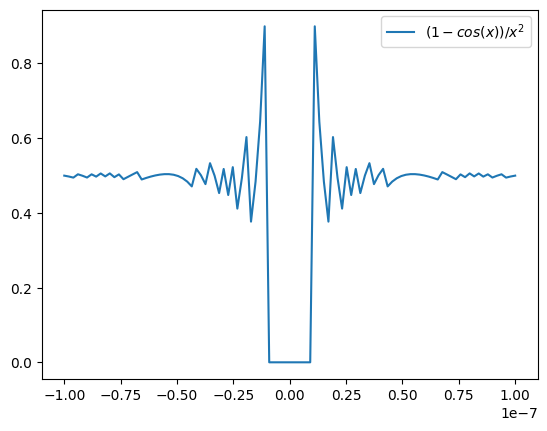

In [ ]:
x = np.linspace(-10e-8,10e-8,100)
y = (1-np.cos(x))/x**2
plt.plot(x,y, label='$(1-cos(x))/x^2$')
plt.legend();

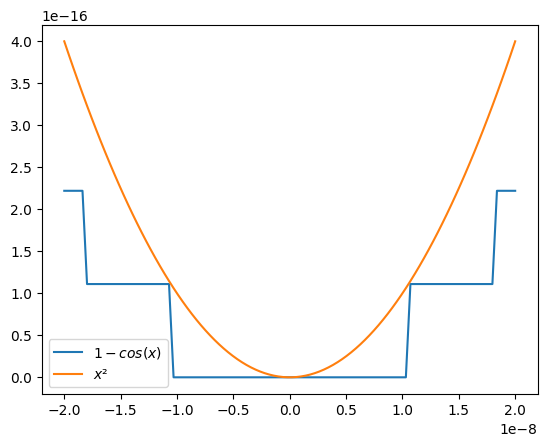

In [ ]:
x = np.linspace(-2e-8,2e-8,100)
y = (1-np.cos(x))
plt.plot(x,y, label='$1-cos(x)$')
plt.plot(x,x**2, label='$x²$')
plt.legend();

Si se quiere evitar el problema, en este caso hay que buscar una identidad trigonométrica que no tenga la resta
$\displaystyle \frac{2 sin^2(\frac{x}{2})}{x^2}$

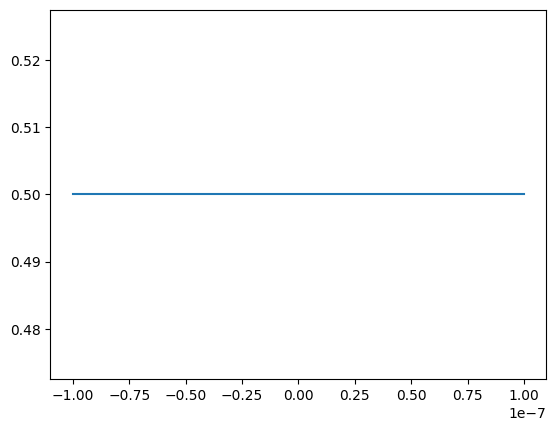

In [ ]:
x = np.linspace(-10e-8,10e-8,100)
y = 2*np.sin(x/2)**2/x**2
plt.plot(x,y);

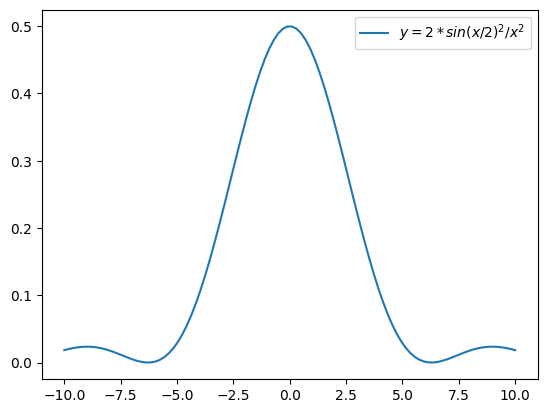

In [ ]:
x = np.linspace(-10,10,100)
y = 2*np.sin(x/2)**2/x**2
plt.plot(x,y, label='$y = 2*sin(x/2)^2/x^2$')
plt.legend();

## Consigna para experimentar:

Qué pasa cuando se quieren sumar una lista de números. ¿Importa el orden en que se suman?

Nos interesa entender las fuentes de error numérico al realizar la suma de muchos números representados con un sistema de punto flotante y comparar distintos algoritmos para realizar esta tarea.

Posibilidades de algoritmos:
* Ası́ como vengan. Porque es lo más simple. Además queremos un baseline para comparar los otros métodos.
* Usando el algoritmo de Kahan. Porque la catedra nos lo dijo
* Ordenándolos de menor a mayor. Para no perder los numeritos chiquitos
* Ordenándolos de mayor a menor. Porque quiero romper todo

También nos interesa lo que tardan estos algoritmos, para eso vamos a medir los tiempos de cómputo en función de la cantidad de elementos

Nos interesa responder:
* Cómo se comportan los algoritmos para varios tamaños?
* Cómo elegir los tamaños?
* Cómo medir los tiempos?
* Los resultados que se obtienen son razonables?

### Pedimos:

- Breve experimentación
- Redacción simulacro de TP no más de unos párrafos (https://www.overleaf.com/)
- Para este informe de prueba:

- No hace falta:

    - Introducción, conclusiones, código de como implementaron una solución al problema o casos de tests para probar que su implementación es correcta.

- Si hace falta:

    - Hipótesis y disusión de los resultados obtenidos.

- Sugerencias adicionales:

    - Planteo del problema cientı́fico. Objetivo de la consigna, qué se quiere investigar. Hipótesis previas sobre como funcionarán las cosas.
    - Explicación del algoritmo/objeto de estudio.
    - Proponer y fundamentar la experimentación: de qué forma se vincula lo que van a experimentar con las hipótesis que quieren validar.
    - Explicar los diferentes métodos utilizados para la experimentación

### Ejemplos

In [ ]:
# Errores que se propagan cuando se repiten muchas operaciones
0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1

0.9999999999999999

In [ ]:
# Sumamos n terminos 1/n
n = 10
suma = 0.0
for i in range(n):
    suma = suma + 1/n
suma

0.9999999999999999

In [ ]:
from numba import jit

In [ ]:
@jit
def suma(lista):
    suma = 0.0
    for x in lista:
        suma = suma + x
    return suma

@jit
def kahan(lista):
    suma = 0.0
    c = 0.0
    for x in lista:
        y = x - c
        t = suma + y
        c = (t - suma) - y
        suma = t
    return suma

In [ ]:
# Serie términos iguales
n = 100
lista = np.array([1/n]*n)
print(lista)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]


In [ ]:
suma(lista),  kahan(lista)

(1.0000000000000007, 1.0)

In [ ]:
# Series geométrica
n = 100
r = 0.9
lista = r**np.arange(n)

# Suma fórmula cerrada
(1 - r**n)/(1-r)

9.999734386011127

In [ ]:
suma(lista), suma(np.sort(lista)), suma(np.sort(lista)[::-1]), kahan(lista)

(9.999734386011122, 9.999734386011127, 9.999734386011122, 9.999734386011127)

In [ ]:
# Series aleatorios diferentes ordenes de magnitud
n = 10000
r = 0.99
np.random.seed(1)
lista = np.array(r**np.random.randint(1,1000,n))

In [ ]:
suma(lista), suma(np.sort(lista)), suma(np.sort(lista)[::-1]), kahan(lista)

(1020.8543202006157,
 1020.8543202006146,
 1020.8543202006157,
 1020.8543202006142)

## Reprote de distribuciones en experimentos con aleatoriedad

Los errores generados al sumar los elementos de la lista, depende del orden de como estén estos elementos. Podemos computar la suma para muchos ordenamientos distintos y ver la distribución de los errores

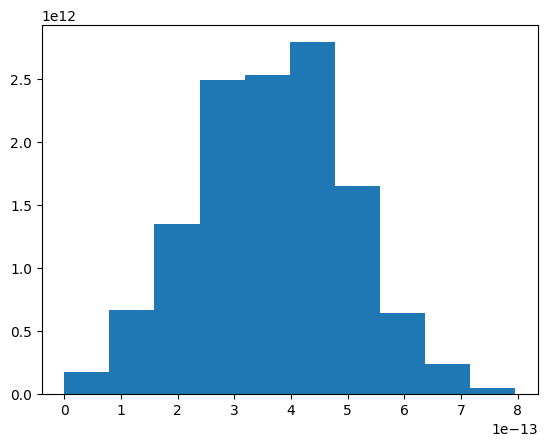

In [ ]:
errores = []
n = 10000
r = 0.99
fn = sum
for i in range(1000):
    lista = r**np.arange(n)
    np.random.seed(i)
    np.random.shuffle(lista)
    errores.append(np.abs(fn(lista)-(1 - r**n)/(1-r)))

plt.hist(errores, density=True);

Qué tipo de distribucioń es? Cómo se puede representar graficamente el valor esperado y la dispersión?

## Medición de tiempos

In [ ]:
import time
tic = time.time()
time.sleep(1)
toc = time.time()
toc-tic

1.001558542251587

In [ ]:
times = %timeit -r 1 -n 1 -o time.sleep(1)

1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
tic = time.time()
suma(lista)
toc = time.time()
(toc-tic)

0.00025343894958496094

In [ ]:
times = %timeit -r 5 -n 100 -o suma(lista)

16 µs ± 167 ns per loop (mean ± std. dev. of 5 runs, 100 loops each)


### Distribución de tiempos

In [ ]:
times = %timeit -q -r 5000 -n 10 -o suma(lista)

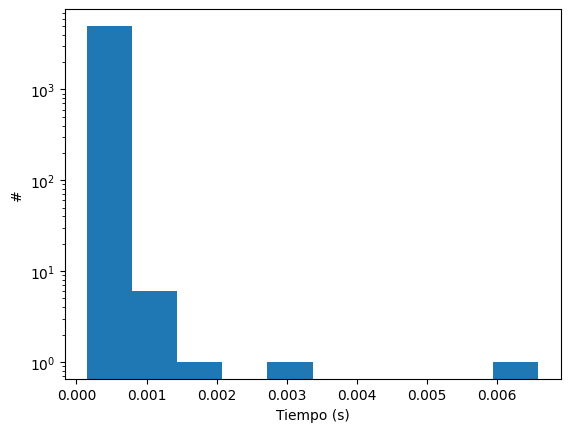

In [ ]:
plt.hist(times.all_runs,log='True');
plt.ylabel('#')
plt.xlabel('Tiempo (s)');

Con escala logarítmica y cambiando los bins también a un arreglo logarítmico se puede ver bien la forma de la distribución de los tiempos. Qué tipo de distribución es?

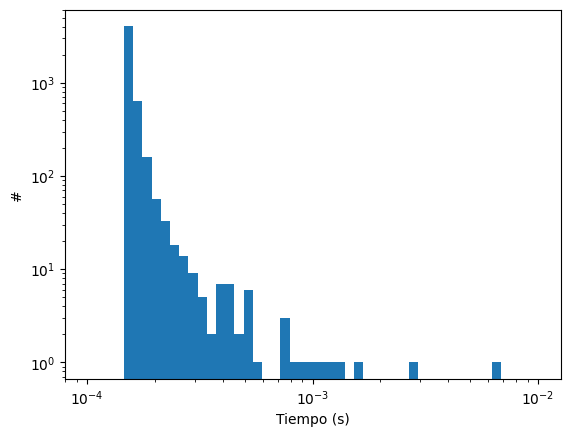

In [ ]:
plt.hist(times.all_runs,bins=np.logspace(-4,-2,50));
plt.ylabel('#')
plt.xlabel('Tiempo (s)');
plt.xscale('log')
plt.yscale('log')

Calcular los tiempos y errores de diferentes algoritmos, utilizando la fórmula de la suma de una serie geométrica para distintas cantidades de términos $n$. Notar como para el error se compara con la fórmula cerrada.

```python
lista = r ** np.arange(n)
error = np.abs(np.sum(lista)-(1 - r**n)/(1-r))
```

Generar los siguientes gráficos (lo más aproximado)

In [ ]:
l=np.arange(4)
print(l)
l=0.5 ** l
print(l)
print(np.sum(l))
print((1-(0.5**4))/(1-0.5))

[0 1 2 3]
[1.    0.5   0.25  0.125]
1.875
1.875



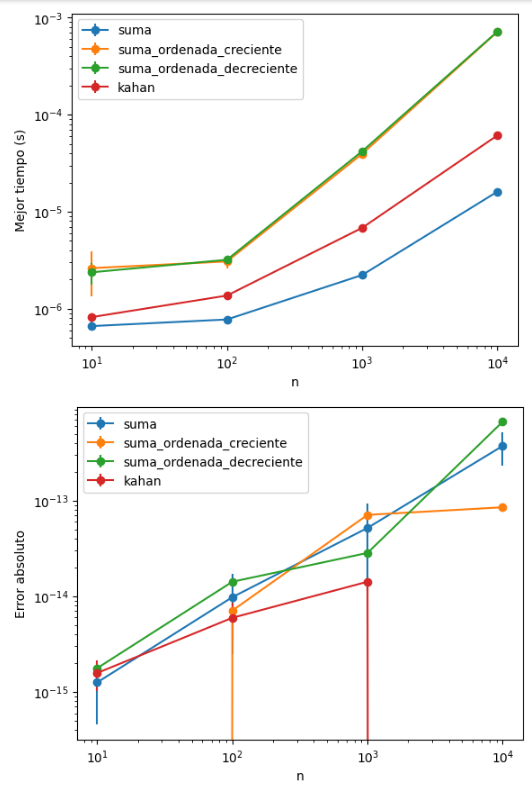